In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.1 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
# Download NLTK stop words
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 24.9 MB/s eta 0:00:00


In [ ]:
!pip install pydot

In [ ]:
from transformers import AutoTokenizer, TFAutoModel, TFAutoModelForMaskedLM

In [ ]:
dataset = load_dataset("orieg/elsevier-oa-cc-by")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for orieg/elsevier-oa-cc-by contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/orieg/elsevier-oa-cc-by
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datas

Generating train split:   0%|          | 0/32072 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4008 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4009 [00:00<?, ? examples/s]

In [ ]:
elsevier_dataset = dataset

In [ ]:
print(elsevier_dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 32072
    })
    test: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4008
    })
    validation: Dataset({
        features: ['title', 'abstract', 'subjareas', 'keywords', 'asjc', 'body_text', 'author_highlights'],
        num_rows: 4009
    })
})


In [ ]:
train_set = elsevier_dataset['train']
train_df = pd.DataFrame(train_set)
print("Shape of the training set:", train_df.shape)


Shape of the training set: (32072, 7)


In [ ]:
val_set = elsevier_dataset['validation']
val_df = pd.DataFrame(val_set)

test_set = elsevier_dataset['test']
test_df = pd.DataFrame(test_set)

In [ ]:
print(val_df.shape)
print(test_df.shape)

(4009, 7)
(4008, 7)


In [ ]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32072 entries, 0 to 32071
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              32072 non-null  object
 1   abstract           32072 non-null  object
 2   subjareas          32072 non-null  object
 3   keywords           32072 non-null  object
 4   asjc               32072 non-null  object
 5   body_text          32072 non-null  object
 6   author_highlights  32072 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB
None


In [ ]:
train_df.head()

,title,abstract,subjareas,keywords,asjc,body_text,author_highlights
0,"Hippocampal neuroinflammation, functional conn...","Background Depression, a condition commonly co...",[NEUR],"[Depression, Hippocampus, Multiple sclerosis, ...",[2803],[The study was conducted at Imperial College L...,[]
1,Performance and microbial features of the part...,The partial nitritation-anammox (PN-AMX) proce...,[ENVI],"[Autotrophic, Denitrification, Fish canning, G...","[2305, 2308, 2311]",[The fish canning industry represents a very i...,[Partial nitritation-anammox process treating ...
2,Natron glass production and supply in the late...,Palestine and Egypt supplied the Mediterranean...,"[ARTS, SOCI]","[Byzantine-Islamic transition, Early Islamic P...","[1204, 3302]",[The centuries following the Arab conquests in...,[Dataset of LA-ICP-MS analyses of early Islami...
3,Datasets on the statistical and algebraic prop...,The data in this article was obtained from the...,[MULT],"[Correlation, Normality test, Primitive Pythag...",[1000],[The data in this article is a description of ...,[]
4,Is market fear persistent? A long-memory analysis,This paper investigates the degree of persiste...,[ECON],"[Fractional integration, Long memory, Market f...",[2003],[According to an old saying on Wall Street the...,[The paper investigates the persistence of mar...


<!-- Drop All subjareas that have a frequency count of less than 1000 -->
Handle class Imbalance by merging some of the classes
Health, Dent, Nurs, Vent —> Medicine
9:28
Econ, Arts, Busi, Deci --> Soci
9:28
Math —> Multi

In [ ]:
def adjust_subjareas(subjareas_list):
    if any(area in subjareas_list for area in ['VETE', 'HEAL', 'DENT', 'NURS']):
        return ['MEDI']
    elif any(area in subjareas_list for area in ['ECON', 'ARTS', 'BUSI', 'DECI']):
        return ['SOCI']
    elif 'MATH' in subjareas_list:
        return ['MULT']
    else:
        return subjareas_list

train_df['subjareas'] = train_df['subjareas'].apply(adjust_subjareas)
val_df['subjareas'] = val_df['subjareas'].apply(adjust_subjareas)
test_df['subjareas'] = test_df['subjareas'].apply(adjust_subjareas)

In [ ]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(32072, 7)
(4009, 7)
(4008, 7)


In [ ]:
label_counts = pd.Series([label for sublist in train_df['subjareas'] for label in sublist]).value_counts()
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Subject Area', 'Frequency']

fig = px.bar(label_counts_df, x='Subject Area', y='Frequency', title='Frequency of Each Subject Area Label')
fig.show()


step 2: Handle further class imbalance

Step 2: Data Pre-processing

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

def trim_text_to_word_limit(text, word_limit=200):
    # Handle list inputs by joining into a single string
    if isinstance(text, list):
        text = ' '.join(text)
    elif text is None:
        return ""

    words = text.split()[:word_limit]
    return ' '.join(words)

def prepare_elsevier_data(train_df, val_df, test_df, abstract_column_name='abstract', body_text_column_name='body_text', label_column_name='subjareas'):
    """
    Prepares the Elsevier corpus splits for multi-label classification, handling abstract and body text,
    where body text might be a list and abstract a string. The abstract is limited to the first 200 words,
    and the body text to the first 300 words.

    Args:
    - train_df, val_df, test_df: DataFrames with 'abstract', 'body_text', and 'subjareas'.
    - abstract_column_name: Column name for abstracts.
    - body_text_column_name: Column name for body texts.
    - label_column_name: Column for labels.

    Returns:
    - Lists of concatenated texts for training, validation, testing, the labels, and unique label names.
    """
    mlb = MultiLabelBinarizer()
    all_labels = pd.concat([train_df[label_column_name], val_df[label_column_name], test_df[label_column_name]])
    mlb.fit(all_labels)

    train_labels = mlb.transform(train_df[label_column_name])
    val_labels = mlb.transform(val_df[label_column_name])
    test_labels = mlb.transform(test_df[label_column_name])

    concatenated_train_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(train_df[abstract_column_name], train_df[body_text_column_name])]
    concatenated_val_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(val_df[abstract_column_name], val_df[body_text_column_name])]
    concatenated_test_texts = [f"{trim_text_to_word_limit(abstract, 200)} [SEP] {trim_text_to_word_limit(body, 300)}" for abstract, body in zip(test_df[abstract_column_name], test_df[body_text_column_name])]

    return (concatenated_train_texts, train_labels,
            concatenated_val_texts, val_labels,
            concatenated_test_texts, test_labels,
            mlb.classes_)


concatenated_train_texts, train_labels, concatenated_val_texts, val_labels, concatenated_test_texts, test_labels, target_names = prepare_elsevier_data(train_df, val_df, test_df)


In [ ]:
print(train_labels[:2])
print(concatenated_train_texts[:2])
print(len(target_names))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]]
['Background Depression, a condition commonly comorbid with multiple sclerosis (MS), is associated more generally with elevated inflammatory markers and hippocampal pathology. We hypothesized that neuroinflammation in the hippocampus is responsible for depression associated with MS. We characterized the relationship between depressive symptoms and hippocampal microglial activation in patients with MS using the 18-kDa translocator protein radioligand [18F]PBR111. To evaluate pathophysiologic mechanisms, we explored the relationships between hippocampal neuroinflammation, depressive symptoms, and hippocampal functional connectivities defined by resting-state functional magnetic resonance imaging. Methods The Beck Depression Inventory (BDI) was administered to 11 patients with MS and 22 healthy control subjects before scanning with positron emission tomography and functional magnetic resonance imaging. We teste

In [ ]:
print(len(concatenated_train_texts))
print(len(concatenated_val_texts))

32072
4009


In [ ]:
# Convert validation labels to a NumPy array
npvalid_labels = np.asarray(val_labels)
nptrain_labels = np.asarray(train_labels)
nptest_labels = np.asarray(test_labels)


step 3: Classification with fine tuned BERT Model

In [ ]:
model_checkpoint = 'allenai/scibert_scivocab_cased'

scibert_tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

scibert_model = TFAutoModel.from_pretrained(model_checkpoint, from_pt=True)

scibert_mlm = TFAutoModelForMaskedLM.from_pretrained(model_checkpoint, from_pt=True)

config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/222k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/442M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
max_length = 500

In [ ]:
train_encodings = scibert_tokenizer(concatenated_train_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
valid_encodings = scibert_tokenizer(concatenated_val_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
test_encodings = scibert_tokenizer(concatenated_test_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

step 3: Set maximum dimension length based on the data

Step 4: Apply tokenization process to  Elsevier corpus. Tokenization converts your text data into a format that the BERT model can understand and process. It involves splitting the text into tokens (words or subwords), truncating sequences to the maximum length (max_length), and padding shorter sequences with zeros.

In [ ]:
def print_encoding_shapes(encodings, encoding_type="Abstract"):
    """
    Prints the shapes of input_ids, token_type_ids, and attention_mask for given encodings.

    Args:
    - encodings: The tokenized encodings from the BERT tokenizer.
    - encoding_type: A string indicating the type of encoding (e.g., "Abstract" or "Body").
    """
    print(f"\n{encoding_type} Texts Encodings Shapes:")
    input_ids_shape = encodings.input_ids.shape
    token_type_ids_shape = encodings.token_type_ids.shape
    attention_mask_shape = encodings.attention_mask.shape

    print(f"Input IDs shape: {input_ids_shape}")
    print(f"Token Type IDs shape: {token_type_ids_shape}")
    print(f"Attention Mask shape: {attention_mask_shape}")

print_encoding_shapes(train_encodings, "concatenated train text")
print_encoding_shapes(valid_encodings, "concatenated val text")
print_encoding_shapes(test_encodings, "concatenated test text")


concatenated train text Texts Encodings Shapes:
Input IDs shape: (32072, 500)
Token Type IDs shape: (32072, 500)
Attention Mask shape: (32072, 500)

concatenated val text Texts Encodings Shapes:
Input IDs shape: (4009, 500)
Token Type IDs shape: (4009, 500)
Attention Mask shape: (4009, 500)

concatenated test text Texts Encodings Shapes:
Input IDs shape: (4008, 500)
Token Type IDs shape: (4008, 500)
Attention Mask shape: (4008, 500)


In [ ]:
import pandas as pd
import numpy as np

def compute_sample_weights(df, label_column):
    """
    Compute sample weights for multi-label classification.

    Parameters:
    - df: pandas DataFrame containing the training data
    - label_column: string name of the DataFrame column containing the labels lists

    Returns:
    - sample_weights: numpy array of sample weights where rows correspond to samples
    """
    label_freq = pd.Series([label for sublist in df[label_column] for label in sublist]).value_counts()

    label_weights = 1 / label_freq

    label_weights /= label_weights.sum()

    label_weight_map = label_weights.to_dict()

    sample_weights = []

    for labels in df[label_column]:
        sample_weight = sum([label_weight_map[label] for label in labels])
        sample_weights.append(sample_weight)

    return np.array(sample_weights)

sample_weights = compute_sample_weights(train_df, 'subjareas')


Step 4: Create a multiclass BERT model

multi-label binarization to convert the subject area labels into a binary format, where each label is represented by a 0 (absence) or 1 (presence).

BERT Model Configuration: A pre-trained BERT model (bert-base-cased) was chosen as the base for feature extraction. On top of it, a custom model was built for classification.

Custom Model: Added dense layers on top of BERT's pooled output, including a final dense layer with a sigmoid activation function to handle multi-label classification.

Loss Function: Used BinaryCrossentropy to treat each output label as an independent binary classification problem.
Optimizer: An Adam optimizer with a learning rate of 0.00005 was configured.


In [ ]:

def build_finetune_scibert(pretrained_model_name_or_path='allenai/scibert_scivocab_cased', num_classes=18, max_length=500, hidden_size=[1024], dropout=0.1, learning_rate=0.00005,from_pt=True):
    tf.keras.backend.clear_session()

    pretrained_LLM = TFAutoModel.from_pretrained(pretrained_model_name_or_path, from_pt=from_pt)
    pretrained_LLM.trainable = True

    input_ids = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.layers.Input(shape=(max_length,), dtype=tf.int32, name='attention_mask')

    llm_inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

    llm_out = pretrained_LLM(llm_inputs)
    output_token = llm_out.last_hidden_state
    cls_token = output_token[:, 0, :]
    hidden = cls_token

    for i, size in enumerate(hidden_size):
        hidden = tf.keras.layers.Dense(size, activation='relu', name=f'hidden_layer_{i}')(hidden)
        hidden = tf.keras.layers.Dropout(dropout)(hidden)

    output_classification = tf.keras.layers.Dense(num_classes, activation='sigmoid')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=[output_classification])

    classification_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                                 loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                 metrics=['accuracy'])

    return classification_model


In [ ]:
num_subject_areas = len(target_names)
num_subject_areas

18

In [ ]:
scibert_model = build_finetune_scibert(pretrained_model_name_or_path=model_checkpoint,
                                                 num_classes=num_subject_areas,
                                                 max_length=max_length)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint

In [ ]:
scibert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 attention_mask (InputLayer  [(None, 500)]                0         []                            
 )                                                                                                
                                                                                                  
 input_ids (InputLayer)      [(None, 500)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1099384   ['attention_mask[0][0]',      
 )                           ngAndCrossAttentions(last_   32         'input_ids[0][0]']           
                             hidden_state=(None, 500, 7                                       

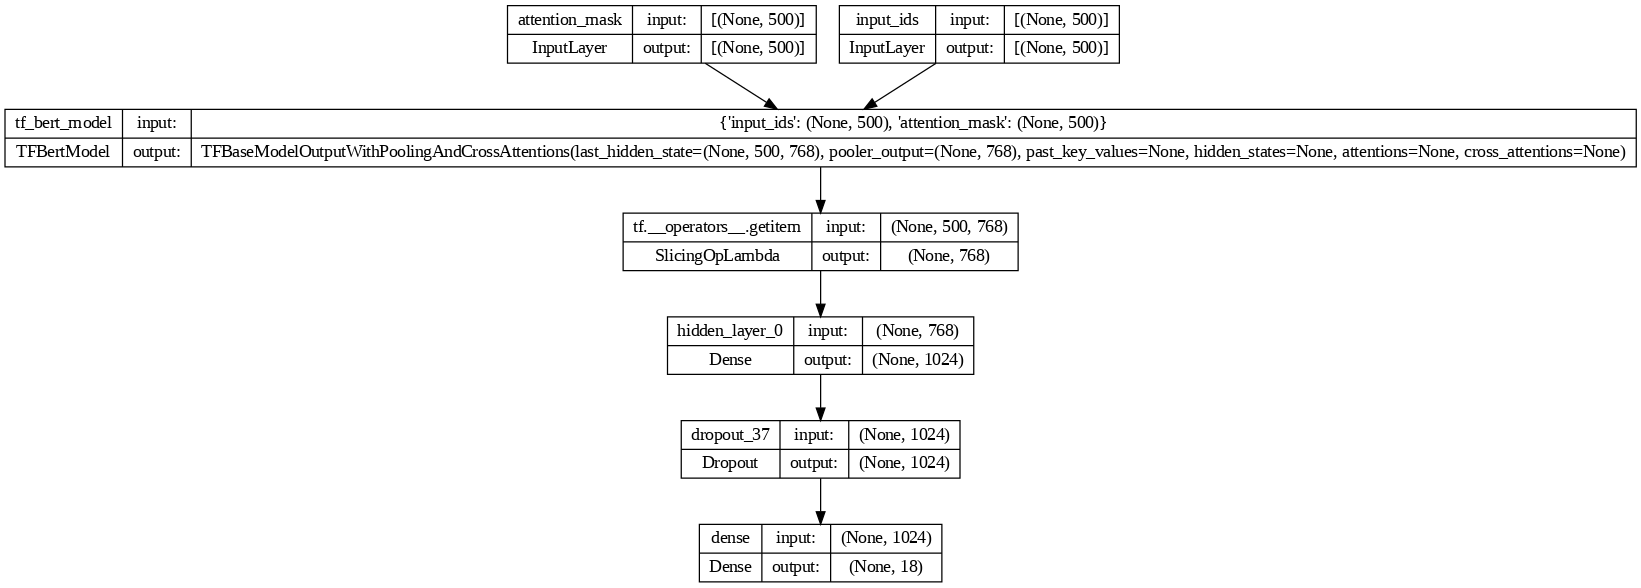

In [ ]:
keras.utils.plot_model(scibert_model, show_shapes=True, show_dtype=False, show_layer_names=True, dpi=90)

In [ ]:
#It takes 10 to 14 minutes to complete an epoch when using a GPU
model_history = scibert_model.fit(
    [train_encodings.input_ids, train_encodings.attention_mask],
    train_labels,
    validation_data=(
        [valid_encodings.input_ids, valid_encodings.attention_mask],
        val_labels
    ),
    batch_size=8,
    epochs=2,
    sample_weight=sample_weights
)

Epoch 1/2


4009/4009 [==============================] - 3928s 967ms/step - loss: 0.0141 - accuracy: 0.5028 - val_loss: 0.1466 - val_accuracy: 0.5520
Epoch 2/2
4009/4009 [==============================] - 3869s 965ms/step - loss: 0.0111 - accuracy: 0.5552 - val_loss: 0.1404 - val_accuracy: 0.5707


Validation Data Set Evaluation

In [ ]:
val_score = scibert_model.evaluate([valid_encodings.input_ids,  valid_encodings.attention_mask],
                                                  val_labels)

print('Val loss:', val_score[0])
print('Val accuracy:', val_score[1])

126/126 [==============================] - 156s 1s/step - loss: 0.1404 - accuracy: 0.5707
Val loss: 0.14036476612091064
Val accuracy: 0.5707159042358398


In [ ]:
val_predictions = scibert_model.predict([valid_encodings.input_ids, valid_encodings.attention_mask])

126/126 [==============================] - 156s 1s/step


126/126 [==============================] - 153s 1s/step
              precision    recall  f1-score   support

        AGRI       0.60      0.85      0.70       434
        BIOC       0.65      0.79      0.71       686
        CENG       0.59      0.55      0.57       193
        CHEM       0.53      0.60      0.56       230
        COMP       0.46      0.51      0.49       160
        EART       0.72      0.83      0.77       235
        ENER       0.66      0.65      0.66       257
        ENGI       0.69      0.48      0.57       440
        ENVI       0.62      0.69      0.65       524
        IMMU       0.53      0.86      0.65       234
        MATE       0.69      0.79      0.74       302
        MEDI       0.80      0.75      0.78       815
        MULT       0.98      0.60      0.75       470
        NEUR       0.74      0.92      0.82       377
        PHAR       0.55      0.66      0.60       217
        PHYS       0.65      0.53      0.58       218
        PSYC       0.52  

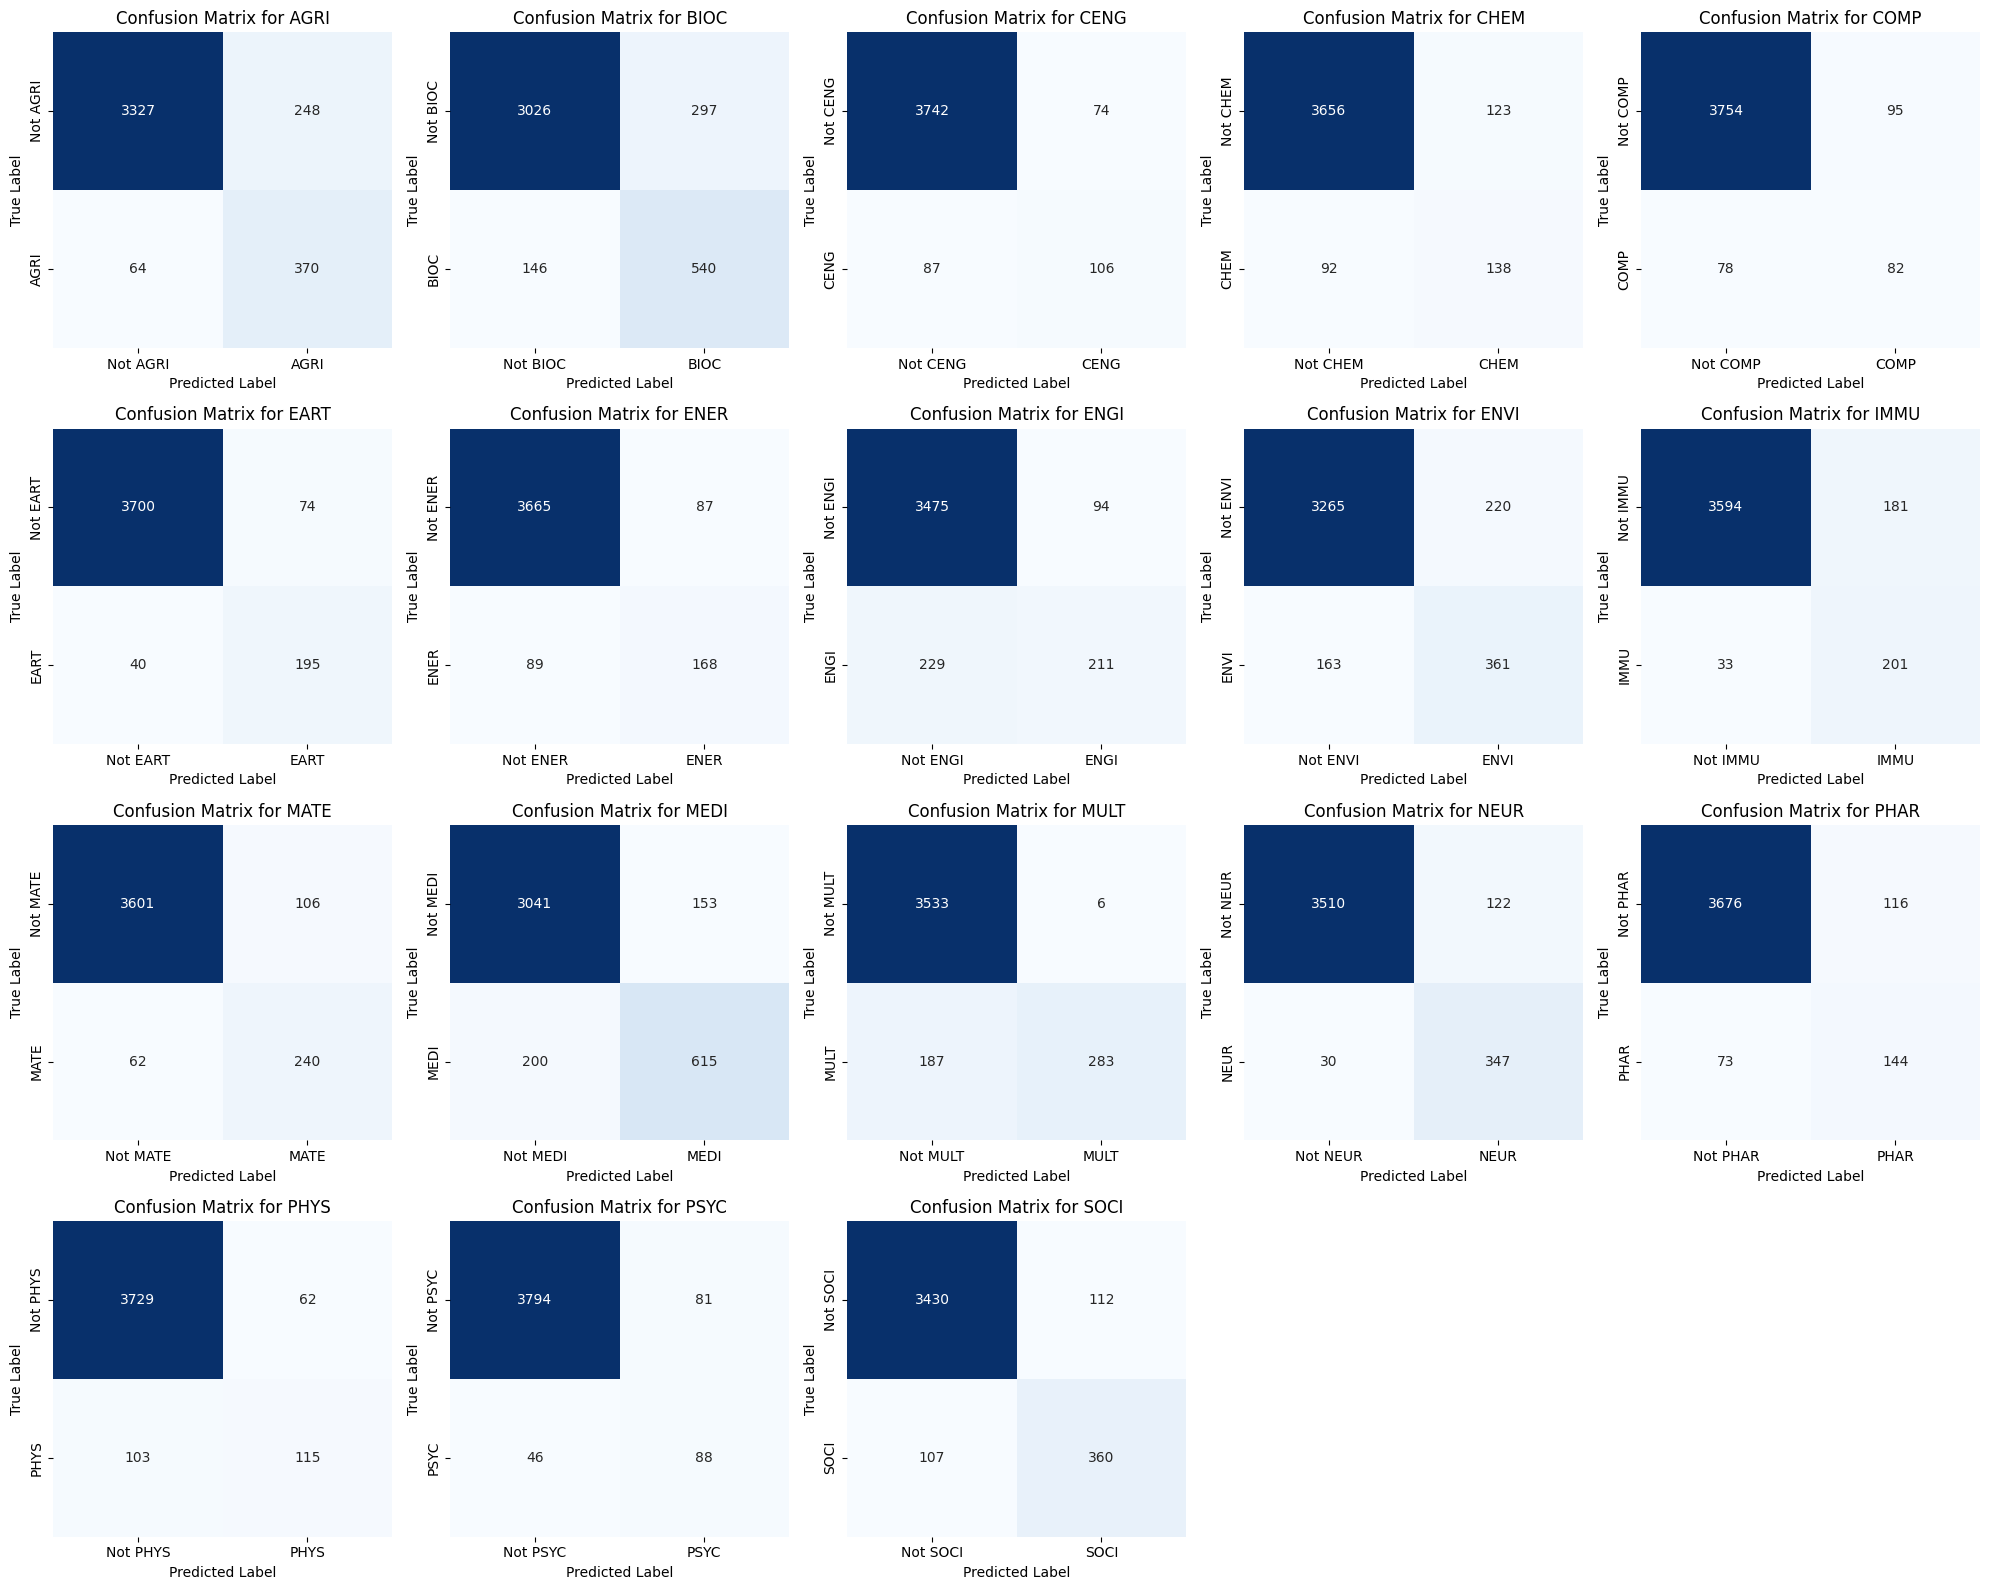

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))  # Set zero_division=1

    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [valid_encodings.input_ids, valid_encodings.attention_mask],
             val_labels,
             target_names)


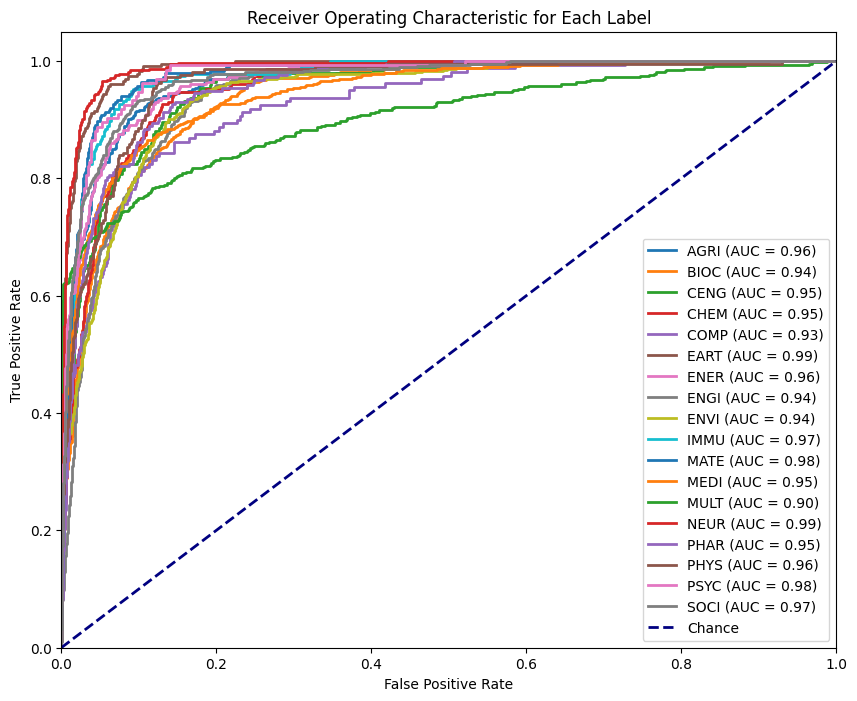

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(val_labels, val_predictions, target_names)


In [ ]:
test_score = scibert_model.evaluate([test_encodings.input_ids, test_encodings.attention_mask],
                                                  test_labels)

print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

126/126 [==============================] - 155s 1s/step - loss: 0.1400 - accuracy: 0.5766
Test loss: 0.14004985988140106
Test accuracy: 0.5765967965126038


In [ ]:
test_predictions = scibert_model.predict([test_encodings.input_ids, test_encodings.attention_mask])

126/126 [==============================] - 153s 1s/step


126/126 [==============================] - 153s 1s/step
              precision    recall  f1-score   support

        AGRI       0.56      0.89      0.69       436
        BIOC       0.65      0.77      0.70       673
        CENG       0.51      0.50      0.50       172
        CHEM       0.52      0.66      0.58       221
        COMP       0.52      0.50      0.51       157
        EART       0.68      0.77      0.72       249
        ENER       0.70      0.66      0.68       241
        ENGI       0.71      0.50      0.59       416
        ENVI       0.65      0.74      0.69       551
        IMMU       0.47      0.83      0.60       224
        MATE       0.70      0.74      0.72       357
        MEDI       0.79      0.73      0.76       821
        MULT       0.99      0.66      0.79       423
        NEUR       0.70      0.89      0.78       332
        PHAR       0.61      0.71      0.66       224
        PHYS       0.65      0.51      0.57       243
        PSYC       0.53  

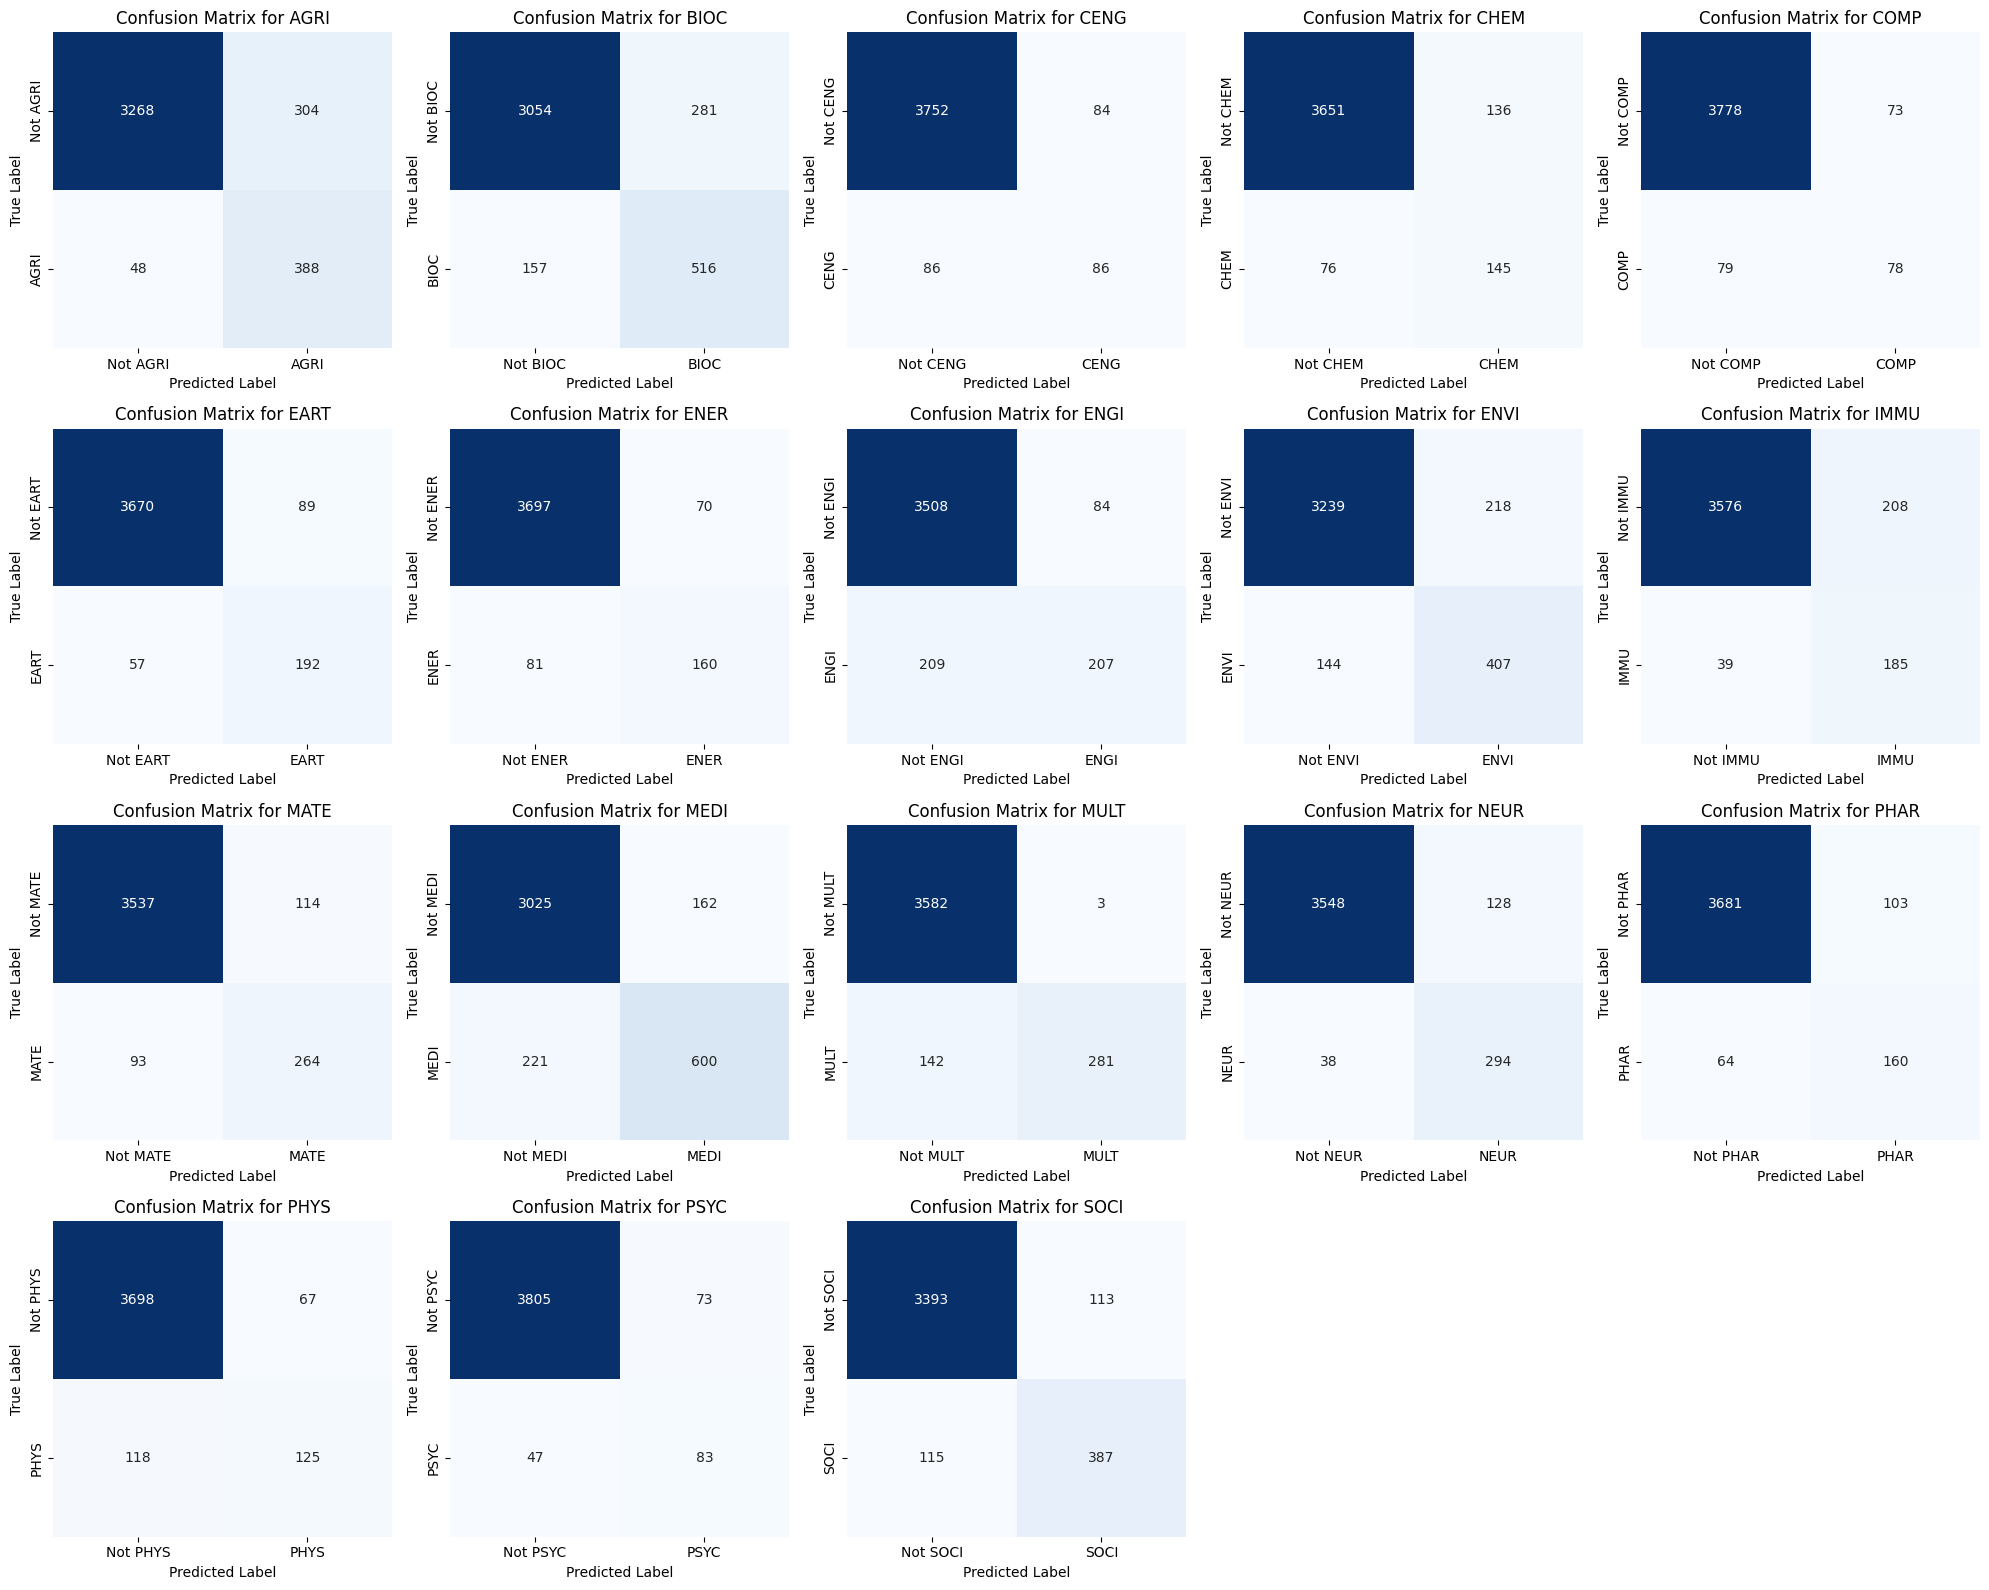

In [ ]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

def show_results(model, features, true_labels, classes, threshold=0.5):
    prob_predictions = model.predict(features)

    yhat_val = (prob_predictions >= threshold).astype(int)

    print(classification_report(true_labels, yhat_val, target_names=classes, zero_division=1))
    confusion_matrices = multilabel_confusion_matrix(true_labels, yhat_val)

    n_classes = len(classes)
    n_cols = 5
    n_rows = int(np.ceil(n_classes / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))

    axes = axes.flatten()

    for i, matrix in enumerate(confusion_matrices):
        sns.heatmap(matrix,
                    annot=True,
                    fmt='d',
                    cmap='Blues',
                    cbar=False,
                    ax=axes[i])
        axes[i].set_title(f'Confusion Matrix for {classes[i]}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_xticklabels(['Not '+classes[i], classes[i]])
        axes[i].set_yticklabels(['Not '+classes[i], classes[i]], va='center')

    for ax in axes[n_classes:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


show_results(scibert_model,
             [test_encodings.input_ids, test_encodings.attention_mask],
             test_labels,
             target_names)


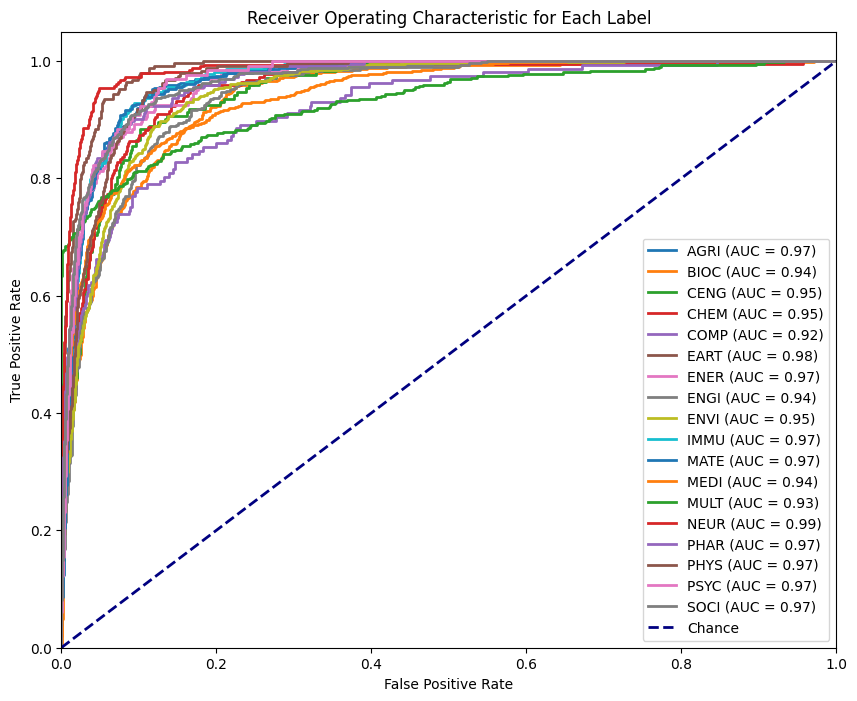

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_multilabel_roc(true_labels, predictions, target_names):
    """
    Function to plot the ROC curves for each label in multi-label classification.

    Parameters:
    - true_labels: Array-like of shape (n_samples, n_labels), ground truth label indicators.
    - predictions: Array-like of shape (n_samples, n_labels), prediction probabilities or decision function.
    - target_names: List of strings of shape (n_labels,), names of each of the labels.

    """
    n_labels = true_labels.shape[1]

    fig, ax = plt.subplots(figsize=(10, 8))

    for i in range(n_labels):
        fpr, tpr, _ = roc_curve(true_labels[:, i], predictions[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, lw=2, label=f'{target_names[i]} (AUC = {roc_auc:.2f})')

    # Plot chance line
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance')

    # Customize the plot
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic for Each Label')
    ax.legend(loc="lower right")

    # Show the plot
    plt.show()

plot_multilabel_roc(test_labels, test_predictions, target_names)


In [ ]:
!pip install google-auth

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

def save_predictions_to_csv(test_predictions, test_texts, test_df, target_names, result_path, threshold=0.5):
    """
    Process model predictions and save a CSV file with abstracts, true labels, predicted labels,
    the most probable predicted label, and its probability.

    Args:
        test_predictions (np.array): The predictions from the model, assumed to be probabilities.
        test_texts (list or np.array): The texts that were input to the model for prediction.
        test_df (pd.DataFrame): The original DataFrame containing the true labels.
        target_names (list): List of target class names corresponding to indices in model outputs.
        result_path (str, optional): Path to save the resulting CSV file. Defaults to './'.
        threshold (float, optional): Probability threshold to consider a prediction as positive. Defaults to 0.5.
    """
    predicted_labels = []
    max_probs = []
    max_labels = []

    for probs in test_predictions:
        # Identify labels exceeding the threshold
        labels = [target_names[idx] for idx, p in enumerate(probs) if p >= threshold]
        predicted_labels.append(labels)

        # Identify the max probability and corresponding label
        max_idx = np.argmax(probs)
        max_prob = probs[max_idx]
        max_label = target_names[max_idx]

        max_probs.append(max_prob)
        if labels:
            max_labels.append(max_label)
        else:
            max_probs[-1] = 0  # Reset max_prob if no labels meet the threshold
            max_labels.append("No Label")

    # Preparing the DataFrame
    result_df = pd.DataFrame({
        'abstract': test_texts,
        'true_label': test_df['subjareas'],
        'pred_label': predicted_labels,
        'max_pred_label': max_labels,
        'max_prediction_probability': max_probs
    })

    result_df['pred_label'] = result_df['pred_label'].apply(lambda x: ', '.join(x) if x else 'No Label')

    # Saving the results
    result_df.to_csv(result_path + 'scibert_threefeatures_cls_.csv', index=False)

    return result_df

result_path = '/content/drive/MyDrive/'
save_predictions_to_csv(test_predictions, concatenated_test_texts, test_df, target_names, result_path)


Mounted at /content/drive


,abstract,true_label,pred_label,max_pred_label,max_prediction_probability
0,Nitrate (NO3−)-rich foods such as green leafy ...,[PHAR],PHAR,PHAR,0.930665
1,This study evaluates a treatment system center...,[ENVI],ENVI,ENVI,0.907243
2,The Act-Belong-Commit campaign is the world's ...,[BIOC],"MEDI, NEUR",NEUR,0.989176
3,A serious threat to pelagic seabird population...,[EART],"AGRI, ENVI",AGRI,0.967914
4,Homeostatic regulation has been shown to resto...,[NEUR],NEUR,NEUR,0.962320
...,...,...,...,...,...
4003,The industrial sector accounts for 17% of end-...,"[ENER, ENGI, ENVI]","ENER, ENGI, ENVI",ENER,0.668951
4004,Revealing the biochemistry associated to micro...,"[BIOC, CHEM, ENVI]","BIOC, CHEM",BIOC,0.856081
4005,"In mammalian cardiac ventricular myocytes, Ca ...","[BIOC, MEDI]",BIOC,BIOC,0.843427
4006,Microtubules control cell architecture by serv...,[BIOC],"AGRI, BIOC",BIOC,0.885814
